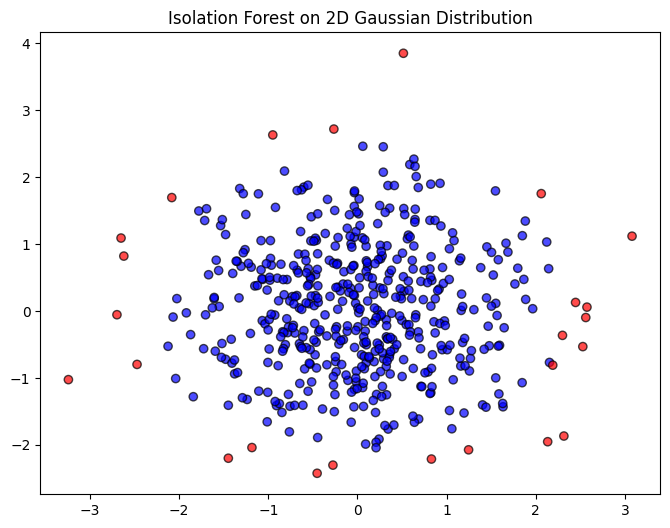

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2D Gaussian data (circle shape with decreasing density at edges)
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity covariance for circular symmetry
X = np.random.multivariate_normal(mean, cov, 500)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
labels = iso_forest.fit_predict(X)

# Map labels to colors: normal -> blue, outliers -> red
colors = np.where(labels == 1, 'blue', 'red')

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title("Isolation Forest on 2D Gaussian Distribution")
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.grid(True)

plt.show()


/tmp/ipykernel_11112/3203779356.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data["anomaly_flag"] = iso_forest.fit_predict(feature_data[[f"lag_{lag}" for lag in range(1, window_size + 1)]])
/tmp/ipykernel_11112/3203779356.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data["anomaly"] = feature_data["anomaly_flag"] == -1


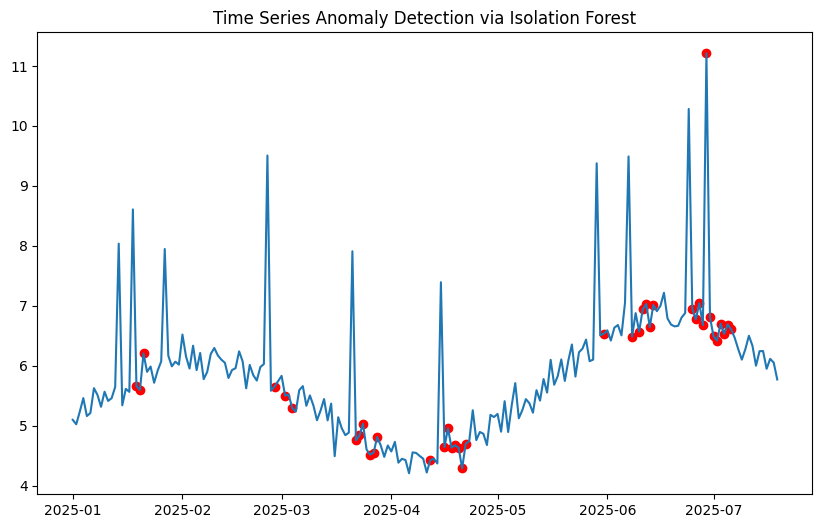

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set seed for reproducibility
np.random.seed(42)

# Generate a synthetic time series
date_range = pd.date_range(start="2025-01-01", periods=200, freq="D")
trend = np.linspace(0, 1, len(date_range))
seasonal = np.sin(np.linspace(0, 3 * np.pi, len(date_range)))
noise = np.random.normal(scale=0.2, size=len(date_range))
values = 5 + trend + seasonal + noise

# Inject anomalies
anomaly_indices = np.random.choice(len(date_range), size=10, replace=False)
values[anomaly_indices] += np.random.normal(3, 0.5, size=len(anomaly_indices))

# Create DataFrame
ts = pd.DataFrame({"value": values}, index=date_range)

# Create lag features for Isolation Forest
window_size = 7
for lag in range(1, window_size + 1):
    ts[f"lag_{lag}"] = ts["value"].shift(lag)

# Drop rows with NaN
feature_data = ts.dropna()

# Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100,contamination=0.2, random_state=42)
feature_data["anomaly_flag"] = iso_forest.fit_predict(feature_data[[f"lag_{lag}" for lag in range(1, window_size + 1)]])

# Map flags to boolean anomalies (1 for normal, -1 for anomaly)
feature_data["anomaly"] = feature_data["anomaly_flag"] == -1

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts["value"], label="Value")
anomaly_dates = feature_data.index[feature_data["anomaly"]]
anomaly_values = feature_data["value"][feature_data["anomaly"]]
plt.scatter(anomaly_dates, anomaly_values, color="red", label="Anomaly")
plt.title("Time Series Anomaly Detection via Isolation Forest")
# plt.xlabel("Date")
# plt.ylabel("Value")
# plt.legend()
# plt.grid(True)
plt.show()


In [ ]:
"""
Max depth = ceiling of log2 subsample size

forest is a list of trees. n = 100. test this n value for my custom datset.

# build forest

node = 

why do we need inedexes?




# custom datset
have two gausion distributions with same values just sifted mean
then play around with the other variable sqish and sqash and other distrobutins.
stay in 2d and 1d


# Questions
how many collumns can isolation forest handle?
is n = 100 really the best in all situations?
is sample =256 really the best in all situations?
why do we use a aproximation value in this algorithom?(speed vs acurracy?)
how many collumns can it handle before perfomrance f1 halfs? (plot it) 
is roc, auc, f1 the best? (for which situations woud wich be better?)


# general Questions
what datatype are the input_columns is it a dataframe. should I rename it?
it is a list of lists. should I at least use numpy arrays?
does a pandas dataframe convert easily to numpy array and list of lists?
is there a big speed difference between using list of list and numpy arrays?
"""

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('myDataset.csv')

# Original data
x1 = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 100]
x2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 100]
x3 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 100]
x4 = [40,  41,  42,  43,  44,  45,  46,  47,  48,  49, 100]
y = [0,0,0,0,0,0,0,0,0,0,1]

d2 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})
#save the DataFrame to a CSV file
d2.to_csv('myDataset.csv', index=False)


table = np.column_stack((x1,x2,x3,x4, y)).tolist()
# table = [x1,y]

# Step 1: Convert to DataFrame
# df = pd.DataFrame(table)

list_of_lists = df.values.tolist()

print(list_of_lists)

rows_count = len(list_of_lists)
feature_count = len(list_of_lists[0])
print("Rows count:", rows_count)
print("Feature count:", feature_count)

print(table)


[[0, 20, 30, 40, 0], [1, 21, 31, 41, 0], [2, 22, 32, 42, 0], [3, 23, 33, 43, 0], [4, 24, 34, 44, 0], [5, 25, 35, 45, 0], [6, 26, 36, 46, 0], [7, 27, 37, 47, 0], [8, 28, 38, 48, 0], [9, 29, 39, 49, 0], [100, 100, 100, 100, 1]]
Rows count: 11
Feature count: 5
[[0, 20, 30, 40, 0], [1, 21, 31, 41, 0], [2, 22, 32, 42, 0], [3, 23, 33, 43, 0], [4, 24, 34, 44, 0], [5, 25, 35, 45, 0], [6, 26, 36, 46, 0], [7, 27, 37, 47, 0], [8, 28, 38, 48, 0], [9, 29, 39, 49, 0], [100, 100, 100, 100, 1]]


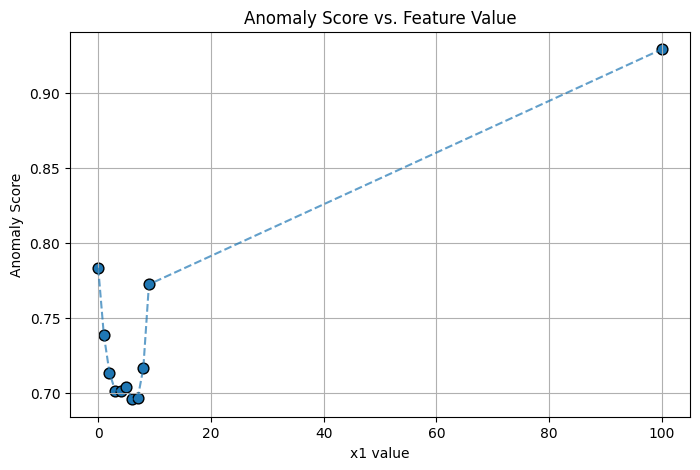

In [23]:
from isolation_forest import IsolationForest
import matplotlib.pyplot as plt


# --- DATA ---
x1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100]
y  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   1]

# Fit the model
iforest = IsolationForest(num_trees=100, subsample_size=256, random_seed=0)
iforest.fit([x1])               # note: expects a list of feature lists
scores = iforest.score_samples()

# Plot score vs. actual x1 value
plt.figure(figsize=(8,5))
plt.scatter(x1, scores, s=60, edgecolor='k')
plt.plot(x1, scores, linestyle='--', alpha=0.7)

plt.title("Anomaly Score vs. Feature Value")
plt.xlabel("x1 value")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

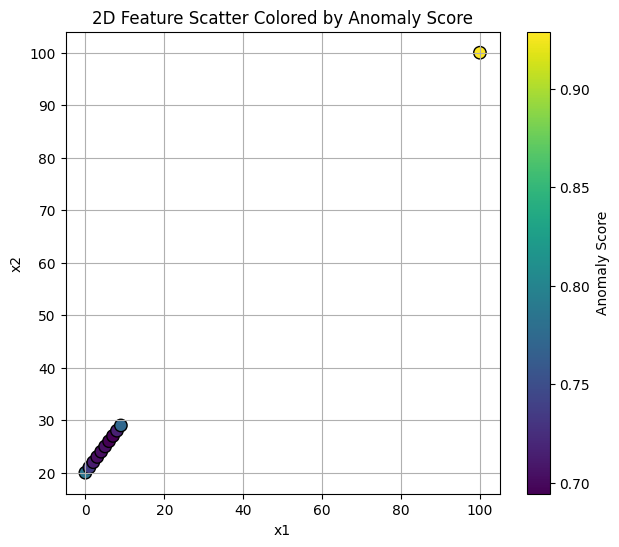

In [21]:
# --- DATA ---
x1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100]
x2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 100]
y  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   1]

# Fit the model
iforest = IsolationForest(num_trees=100, subsample_size=256, random_seed=0)
iforest.fit([x1,x2])               # note: expects a list of feature lists
scores = iforest.score_samples()

plt.figure(figsize=(7,6))
sc = plt.scatter(x1, x2, c=scores, s=80, edgecolor='k', cmap='viridis')
plt.colorbar(sc, label="Anomaly Score")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("2D Feature Scatter Colored by Anomaly Score")
plt.grid(True)
plt.show()

In [20]:
import pandas as pd
import plotly.express as px
from isolation_forest import IsolationForest

# --- DATA ---
x1 = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 100]
x2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 100]
x3 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 100]

# Fit the model and get scores
iforest = IsolationForest(num_trees=100, subsample_size=256, random_seed=0)
iforest.fit([x1, x2])
scores = iforest.score_samples()

# Build a DataFrame for plotting
df = pd.DataFrame({
    'x1':    x1,
    'x2':    x2,
    'score': scores
})

# Create an interactive scatter
fig = px.scatter(
    df,
    x='x1',
    y='x2',
    color='score',
    color_continuous_scale=[(0, "blue"), (1, "red")],
    hover_data={'score': ':.3f'},
    title="Interactive 2D Scatter of (x1, x2) Colored by Anomaly Score"
)

# Show it in a Jupyter notebook or Dash app
fig.show()


In [19]:
import pandas as pd
import plotly.express as px
from isolation_forest import IsolationForest

# --- DATA ---
x1 = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 100]
x2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 100]
x3 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 100]

# Fit the model on all three features
iforest = IsolationForest(num_trees=100, subsample_size=256, random_seed=0)
iforest.fit([x1, x2, x3])
scores = iforest.score_samples()

# Build a DataFrame for plotting
df = pd.DataFrame({
    'x1':    x1,
    'x2':    x2,
    'x3':    x3,
    'score': scores
})

# Create an interactive 3D scatter
fig = px.scatter_3d(
    df,
    x='x1',
    y='x2',
    z='x3',
    color='score',
    color_continuous_scale=[(0, "blue"), (1, "red")],
    hover_data={'score': ':.3f'},
    title="Interactive 3D Scatter of (x1, x2, x3) Colored by Anomaly Score"
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()


In [17]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from isolation_forest import IsolationForest

# --- DATA (same as above) ---
x1 = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 100]
x2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 100]
x3 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 100]
x4 = [40,  41,  42,  43,  44,  45,  46,  47,  48,  49, 100]


# Fit model
iforest = IsolationForest(num_trees=100, subsample_size=256, random_seed=0)
iforest.fit([x1, x2, x3, x4])
scores = iforest.score_samples()

# Prepare matrix for PCA
data_matrix = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})

# PCA to 2 components
pca = PCA(n_components=2, random_state=0)
proj = pca.fit_transform(data_matrix)

# Build DataFrame for plotting
df2 = pd.DataFrame({
    'PC1':   proj[:,0],
    'PC2':   proj[:,1],
    'score': scores
})

# 2D scatter of PCA projection
fig2 = px.scatter(
    df2,
    x='PC1',
    y='PC2',
    color='score',
    color_continuous_scale=[(0, "blue"), (1, "red")],
    hover_data={'score': ':.3f'},
    title="PCA Projection (2D) Colored by Anomaly Score"
)
fig2.show()
